In [26]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [28]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='softmax')
])

In [29]:
# Print the model summary

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_26 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_27 (Dense)             (None, 16)                272       
Total params: 13,104
Trainable params: 13,104
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [33]:
# Build the Sequential convolutional neural network model

# Build the Sequential feedforward neural network model
model = Sequential([
    Conv2D(16,(3,3), activation="relu",padding ="SAME",input_shape = (28,28,3)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [34]:
# Print the model summary

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1296)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 16)                20752     
_________________________________________________________________
dense_32 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_33 (Dense)             (None, 10)                170       
Total params: 21,642
Trainable params: 21,642
Non-trainable params: 0
_________________________________________________

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [45]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate = 0.005)
acc= tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer = opt,
             loss = "sparse_categorical_crossentropy",
             metrics = [acc,mae])

In [46]:
# Print the resulting model attributes

print (model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x73cf334b1ef0>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x73cf334fcdd8>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [49]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [54]:
model = Sequential([
    Conv2D(16,(3,3), activation="relu",input_shape = (28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate = 0.005)
acc= tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer = opt,
             loss = "sparse_categorical_crossentropy",
             metrics = [acc,mae])

#### Load the data

In [51]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [57]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [59]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [60]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images /255
test_images = test_images / 255


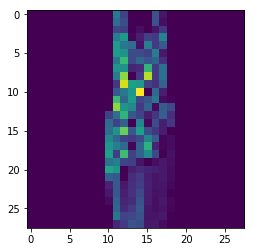

label: Dress


In [65]:
# Display one of the images

i = 5565
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

#### Fit the model

In [71]:
# Fit the model

history = model.fit(train_images[..., np.newaxis], train_labels, epochs = 8, batch_size=256, verbose = 2)

Train on 60000 samples
Epoch 1/8
60000/60000 - 51s - loss: 0.3564 - sparse_categorical_accuracy: 0.8741 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 - 51s - loss: 0.3297 - sparse_categorical_accuracy: 0.8828 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 - 50s - loss: 0.3132 - sparse_categorical_accuracy: 0.8879 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 - 49s - loss: 0.3030 - sparse_categorical_accuracy: 0.8924 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 - 49s - loss: 0.2963 - sparse_categorical_accuracy: 0.8939 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 - 50s - loss: 0.2879 - sparse_categorical_accuracy: 0.8965 - mean_absolute_error: 4.4200
Epoch 7/8
60000/60000 - 50s - loss: 0.2817 - sparse_categorical_accuracy: 0.8986 - mean_absolute_error: 4.4200
Epoch 8/8
60000/60000 - 50s - loss: 0.2739 - sparse_categorical_accuracy: 0.9011 - mean_absolute_error: 4.4200


#### Plot training history

In [73]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.356417,0.874100,4.420000
1,0.329651,0.882833,4.420000
2,0.313239,0.887900,4.420000
3,0.302955,0.892367,4.420002
4,0.296269,0.893933,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

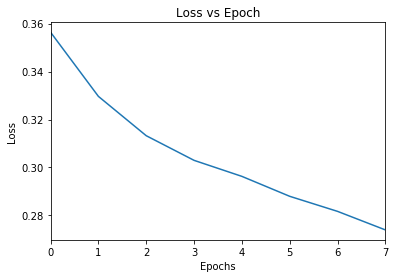

In [75]:
# Make a plot for the loss
loss_plot = df.plot(y="loss", title = "Loss vs Epoch", legend = False)
loss_plot.set(xlabel = "Epochs", ylabel = "Loss")


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Accuracy')]

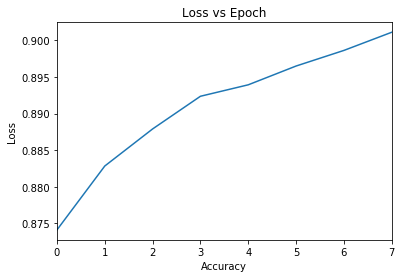

In [79]:
# Make a plot for the accuracy

loss_plot = df.plot(y="sparse_categorical_accuracy", title = "Loss vs Epoch", legend = False)
loss_plot.set(xlabel = "Accuracy", ylabel = "Loss")


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'MAE')]

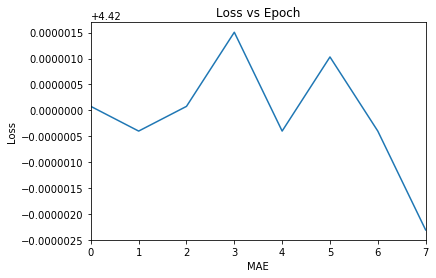

In [78]:
# Make a plot for the additional metric


loss_plot = df.plot(y="mean_absolute_error", title = "Loss vs Epoch", legend = False)
loss_plot.set(xlabel = "MAE", ylabel = "Loss")


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [83]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis],test_labels, verbose =2)

10000/1 - 5s - loss: 0.3658 - sparse_categorical_accuracy: 0.8883 - mean_absolute_error: 4.4200


#### Make predictions from the model

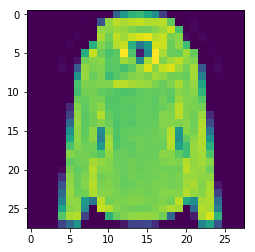

Label: Coat


In [97]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")



In [98]:
# Get the model predictions
predictions = model.predict(test_image[np.newaxis,..., np.newaxis])
print(f"Model Prediction : {labels[np.argmax(predictions)]}")

Model Prediction : Coat
